# Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
# Example data
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1])
y_pred = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


In [ ]:
# Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision}")

Precision: 0.8


In [ ]:
# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall}")

Recall: 0.6666666666666666


In [ ]:
# F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.7272727272727272


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[3 1]
 [2 4]]


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Example dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target
model = LogisticRegression(max_iter=200)

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(model, X, y, cv=kf)
print(f"K-Fold Cross-Validation Scores: {kf_scores}")

K-Fold Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]


# Hands-on: Comparing different Classification Models

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Use a subset of the dataset for quicker computation
subset_size = 10000
X, y = X[:subset_size], y[:subset_size]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(kernel='linear')
}

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Compare models
for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} Accuracy: {np.mean(scores)}")

Logistic Regression Accuracy: 0.9162571428571429
Random Forest Accuracy: 0.9689428571428571


In [ ]:
# Analyze performance
results = {
    "Logistic Regression": [],
    "Random Forest": [],
    "Support Vector Machine": []
}

In [ ]:
# K-Fold Cross-Validation
for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Scores: {scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(scores)}")
    print(f"{model_name} Standard Deviation: {np.std(scores)}")

Logistic Regression Scores: [0.904  0.8815 0.892  0.873  0.8885]
Logistic Regression Mean Accuracy: 0.8877999999999998
Logistic Regression Standard Deviation: 0.010385566907973792
Random Forest Scores: [0.9495 0.949  0.949  0.945  0.9485]
Random Forest Mean Accuracy: 0.9481999999999999
Random Forest Standard Deviation: 0.0016309506430300213
Support Vector Machine Scores: [0.9225 0.9105 0.9215 0.9015 0.9135]
Support Vector Machine Mean Accuracy: 0.9138999999999999
Support Vector Machine Standard Deviation: 0.00770973410695856


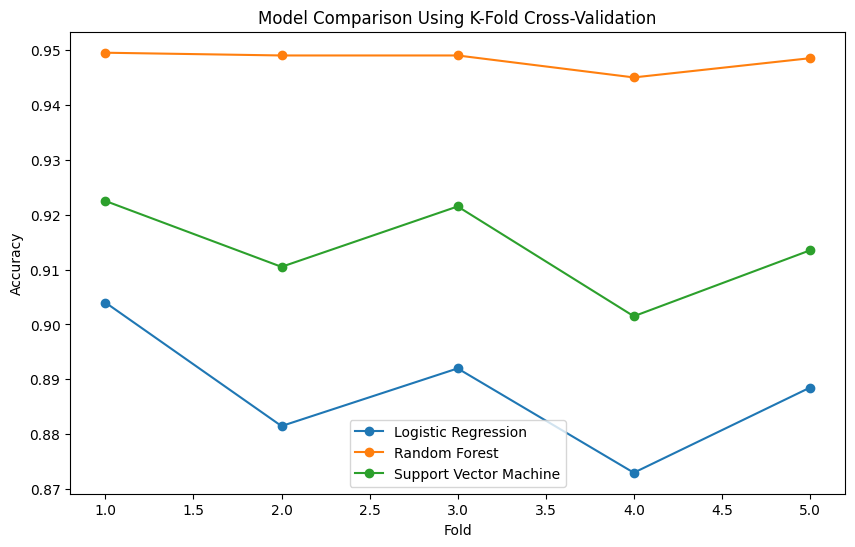

In [ ]:
# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(range(1, kf.n_splits + 1), scores, marker='o', label=model_name)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Comparison Using K-Fold Cross-Validation')
plt.legend()
plt.show()